In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as py
import time
from datetime import datetime


In [5]:
covid_file = "../CSV/covid_us_county.csv"
population_file="../CSV/US_population.csv"

covid_df = pd.read_csv(covid_file)

population_df=pd.read_csv(population_file)

covid_df


,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [4]:
population_df

,state,Population
0,United States,328239523
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804
5,California,39512223
6,Colorado,5758736
7,Connecticut,3565287
8,Delaware,973764
9,District of Columbia,705749


In [5]:
case = covid_df.groupby(["state"]).max()["cases"]
mean_state=covid_df.groupby(["state"]).mean()["cases"]

covid_by_state=pd.DataFrame({"Cases":case,
                             "Mean" :mean_state}).reset_index()
covid_by_state




,state,Cases,Mean
0,Alabama,83039,3587.029276
1,Alaska,32413,874.319037
2,American Samoa,0,0.000000
3,Arizona,573082,23094.614915
4,Arkansas,44983,2001.059092
5,California,1276254,27537.130389
6,Colorado,75412,3331.617100
7,Connecticut,101119,14530.079781
8,Delaware,65530,8946.099818
9,Diamond Princess,49,44.080146


In [15]:
merge_df = pd.merge(covid_by_state , population_df, on="state")

merge_df["Infection Rate"]=(merge_df["Cases"]/merge_df["Population"]*100)
merge_df=merge_df.sort_values('Infection Rate', ascending=False)
merge_df                        
#merge_df.to_csv("../CSV/Infection_rate.csv" )


,state,Cases,Mean,Population,Infection Rate
40,Rhode Island,99884,9130.723393,1059361,9.428703
28,Nevada,273860,7710.845844,3080156,8.891108
2,Arizona,573082,23094.614915,7278717,7.873393
8,District of Columbia,49973,7645.292046,705749,7.080846
7,Delaware,65530,8946.099818,973764,6.729557
45,Utah,157373,4818.873037,3205958,4.908767
1,Alaska,32413,874.319037,731545,4.430760
13,Illinois,561168,5948.135526,12671821,4.428472
27,Nebraska,71755,1070.415281,1934408,3.709404
42,South Dakota,31851,834.806172,884659,3.600370


In [6]:
Ten_top=merge_df.nlargest(10,"Infection Rate")
Ten_top

,state,Cases,Mean,Population,Infection Rate
40,Rhode Island,99884,9130.723393,1059361,9.428703
28,Nevada,273860,7710.845844,3080156,8.891108
2,Arizona,573082,23094.614915,7278717,7.873393
8,District of Columbia,49973,7645.292046,705749,7.080846
7,Delaware,65530,8946.099818,973764,6.729557
45,Utah,157373,4818.873037,3205958,4.908767
1,Alaska,32413,874.319037,731545,4.430760
13,Illinois,561168,5948.135526,12671821,4.428472
27,Nebraska,71755,1070.415281,1934408,3.709404
42,South Dakota,31851,834.806172,884659,3.600370


In [7]:
#group by month

covid_df.index = pd.to_datetime(covid_df['date'])
                                #format='%y-%m-%d %I:%M%p')
covid_df.groupby(by=[covid_df.index.month, covid_df.index.year])
covid_df.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
date,,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [8]:
#seprating date value
covid_df['day'] = covid_df.index.day
covid_df['month'] = covid_df.index.month
covid_df['year'] = covid_df.index.year
covid_df

,fips,county,state,lat,long,date,cases,state_code,deaths,day,month,year
date,,,,,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,22,1,2020
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,23,1,2020
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,24,1,2020
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,25,1,2020
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-18,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-18,664,WY,6,18,7,2021
2021-07-19,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-19,665,WY,6,19,7,2021
2021-07-21,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-07-21,669,WY,6,21,7,2021


In [9]:
States_df=covid_df.loc[(covid_df["state"]=="Florida")|(covid_df["state"]=="Indiana")|(covid_df["state"]=="Wisconsin")|(covid_df["state"]=="Louisiana")]
cases=States_df.groupby(["year","month","state"]).max()["cases"]

unimpacted_states=pd.DataFrame({
                            "Infection Rate":cases,
                            }).reset_index()
unimpacted_states.drop(unimpacted_states[unimpacted_states['year'] == 2021].index, inplace = True)
unimpacted_states["month"].replace({1: "January",2: "February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}, inplace=True)

unimpacted_states



,year,month,state,Infection Rate
0,2020,January,Florida,0
1,2020,January,Indiana,0
2,2020,January,Louisiana,0
3,2020,January,Wisconsin,0
4,2020,February,Florida,0
5,2020,February,Indiana,0
6,2020,February,Louisiana,0
7,2020,February,Wisconsin,0
8,2020,March,Florida,2123
9,2020,March,Indiana,964


In [10]:
Florida_df=unimpacted_states.loc[(unimpacted_states["state"]=="Florida")]
Louisiana_df=unimpacted_states.loc[(unimpacted_states["state"]=="Louisiana")]
Wisconsin_df=unimpacted_states.loc[(unimpacted_states["state"]=="Wisconsin")]
Indiana_df=unimpacted_states.loc[(unimpacted_states["state"]=="Indiana")]


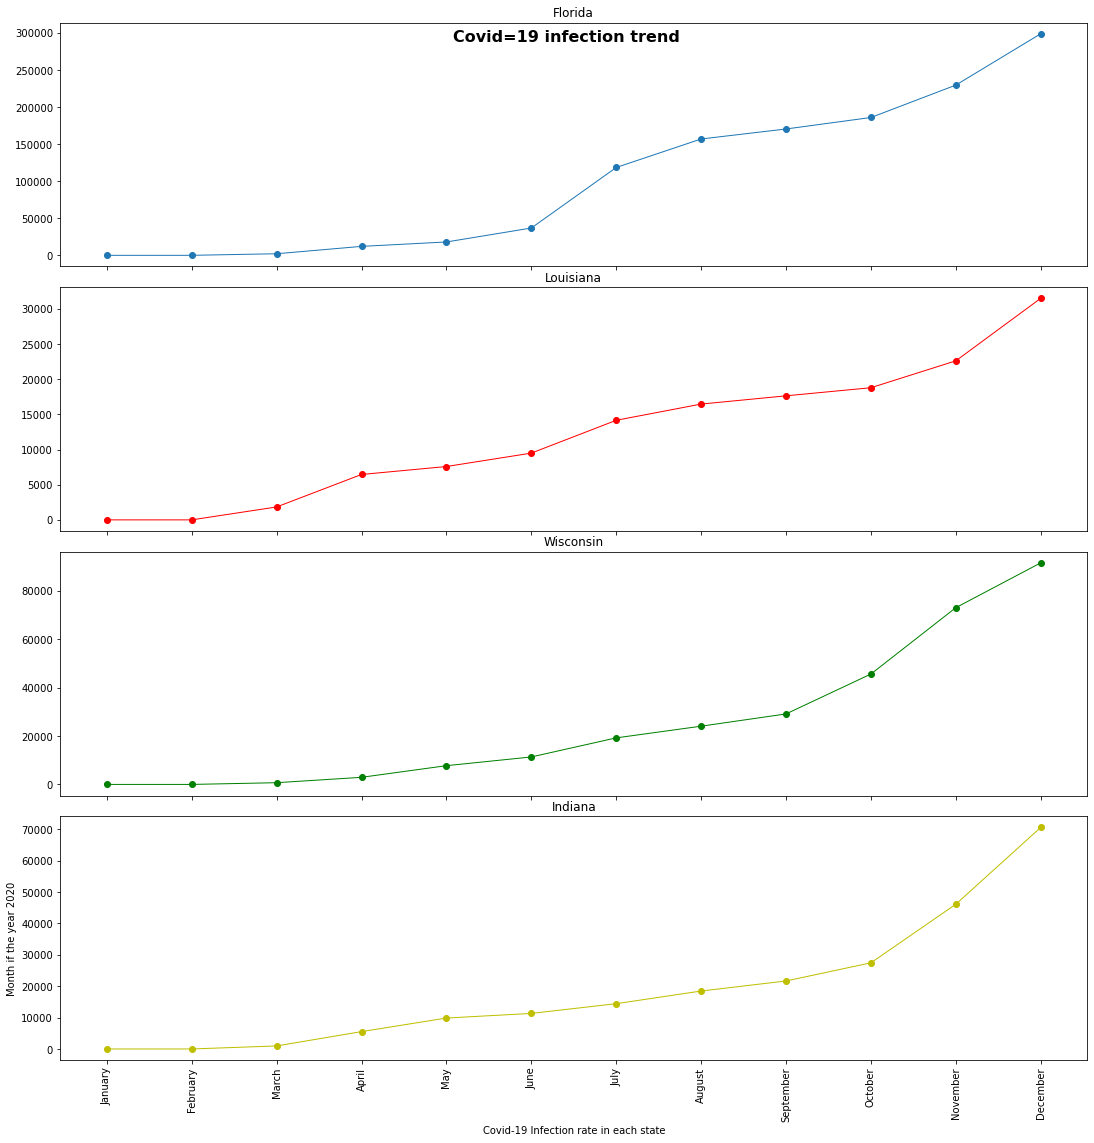

In [11]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(15,15))
fig.tight_layout()

fig.suptitle("Covid=19 infection trend", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)

ax1.plot(Florida_df['month'],Florida_df['Infection Rate'], linewidth=1, marker="o")
ax1.ticklabel_format(style='plain', useOffset=False, axis='y')
ax1.set_title("Florida")

ax2.plot(Louisiana_df["month"], Louisiana_df['Infection Rate'], linewidth=1, marker="o", color="r")
ax2.ticklabel_format(style='plain', useOffset=False, axis='y')
ax2.set_title("Louisiana")

ax3.plot( Wisconsin_df["month"], Wisconsin_df['Infection Rate'], linewidth=1, marker="o", color="g")
ax3.ticklabel_format(style='plain', useOffset=False, axis='y')
ax3.set_title("Wisconsin")

ax4.plot(Indiana_df["month"], Indiana_df['Infection Rate'], linewidth=1, marker="o", color="y")
ax4.ticklabel_format(style='plain', useOffset=False, axis='y')
ax4.set_ylabel("Month if the year 2020")
ax4.set_xlabel("Covid-19 Infection rate in each state")
ax4.set_title("Indiana")
plt.savefig("../Visualizations/Unimpacted_cities_covid_trend.png")
plt.show()

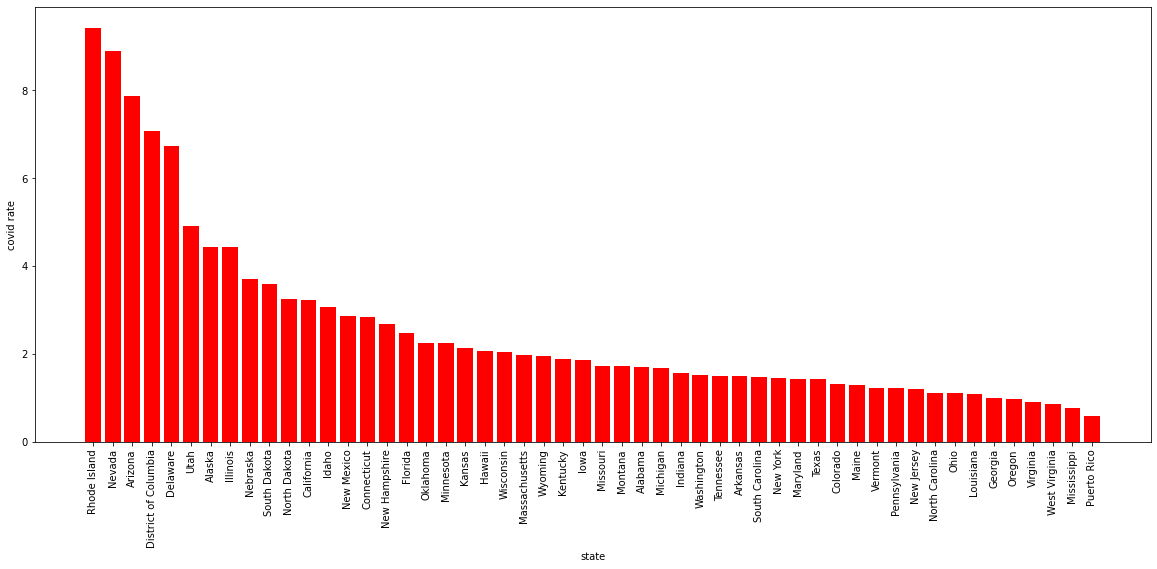

In [16]:
fig=plt.figure(num=None, figsize=(20,8))
x_axis=(merge_df["state"])
y_axis=(merge_df["Infection Rate"]) 
plt.bar(x_axis,y_axis, color="red" )
plt.xticks(rotation=90)

plt.xlabel('state')
plt.ylabel('covid rate')
#a=py.arange(52)
#plt.xaxis.set_ticks(a)
plt.show()


In [ ]:

# top 10 cities
plt.figure ()
Ten_top.plot(x="state", y="Infection Rate" ,kind="bar",)
plt.xlabel('State')
plt.ylabel('Number of Positive covid tests in 2020')


plt.savefig("../Visualizations/top_10_States_covid_Infection.png")

